# Bharat Intern - Data Science

# Task - 2 : Titanic Classification

----By Devalla Ganesh Babu

In [1]:
#Importing Libraries.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

Data pre-processing

In [37]:
#reading in the titanic_train.csv file into a pandas dataframe.
df_train=pd.read_csv('F:/Bharat Intern - Data Science/titanic_train.csv')

In [38]:
df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [39]:
df_test1=pd.read_csv('F:/Bharat Intern - Data Science/titanic_test.csv')

In [40]:
df_test1.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [41]:
df1=pd.read_csv('F:/Bharat Intern - Data Science/gender_submission.csv')

In [43]:
df1.head()

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1


In [44]:
df1.shape

(418, 2)

In [45]:
df_test1.shape

(418, 11)

Survived Variable is missing the test dataset, so we have have other dataframe which contains the survived data for test dataset Here we have to merge both the dataset

In [46]:
df_test = pd.merge(df1, df_test1, how='left', on='PassengerId')
df_test.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [47]:
# concatenating the train and test data as a single dataframe

df = pd.concat([df_train, df_test]).reset_index(drop=True)
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [49]:
df.duplicated().sum()

0

In [50]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  1309 non-null   int64  
 1   Survived     1309 non-null   int64  
 2   Pclass       1309 non-null   int64  
 3   Name         1309 non-null   object 
 4   Sex          1309 non-null   object 
 5   Age          1046 non-null   float64
 6   SibSp        1309 non-null   int64  
 7   Parch        1309 non-null   int64  
 8   Ticket       1309 non-null   object 
 9   Fare         1308 non-null   float64
 10  Cabin        295 non-null    object 
 11  Embarked     1307 non-null   object 
dtypes: float64(2), int64(5), object(5)
memory usage: 122.8+ KB


In [51]:
df.isna().sum()

PassengerId       0
Survived          0
Pclass            0
Name              0
Sex               0
Age             263
SibSp             0
Parch             0
Ticket            0
Fare              1
Cabin          1014
Embarked          2
dtype: int64

# Dealing with the Null Values

In [52]:
# Variable Cabin has more than 95% of missing data, so it is not useful
# Imputing large number of Null value can lead to biasing, so it is good to drop the column

df.drop(['Cabin'], axis=1, inplace=True)

print('Number of column: ', df.shape[1])

Number of column:  11


Imputing the Null values in variable Age

Segregating the data as groups with PClass(1,2,3), then the mean of the each class will be imputed to the Null in the respective classes. This will help avoiding the biasing of imputed data.

In [53]:
df.Age.mean()

29.881137667304014

In [54]:
df.Pclass.unique()

array([3, 1, 2], dtype=int64)

In [55]:
# Finding the mean value of each passenger classes using groupby

df.groupby('Pclass')['Age', 'Pclass'].mean()

C:\Users\DELL\AppData\Local\Temp\ipykernel_3056\3818730013.py:3: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  df.groupby('Pclass')['Age', 'Pclass'].mean()


,Age,Pclass
Pclass,,
1,39.159930,1.0
2,29.506705,2.0
3,24.816367,3.0


In [56]:
def impute_age(cols):
    
    Age = cols[0]
    Pclass = cols[1]
    
    if pd.isnull(Age):
        
        if Pclass == 1:
            return 39
        elif Pclass == 2:
            return 29.50
        else:
            return 25
    else:
        return Age

In [57]:
# imputing the mean age to null values
df['Age'] = df[['Age', 'Pclass']].apply(impute_age, axis=1)

# Droping the datapoints which have very less Null values (Fare, Embarked)
df.dropna(inplace=True)

In [58]:
df.isna().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

Dropping the column with unique Identity such as (Name, Ticket, passengerId), which does not help much in Analysing and classifying the Data

In [59]:
# Dropping the unwanted Columns
df.drop(['PassengerId', 'Name', 'Ticket'], axis=1, inplace=True)

In [60]:
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


In [61]:
df.shape

(1306, 8)

In [62]:
df.dtypes

Survived      int64
Pclass        int64
Sex          object
Age         float64
SibSp         int64
Parch         int64
Fare        float64
Embarked     object
dtype: object

In [63]:
df.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare
count,1306.000000,1306.000000,1306.000000,1306.00000,1306.000000,1306.000000
mean,0.376723,2.296325,29.317129,0.50000,0.385911,33.223956
std,0.484750,0.837037,13.067699,1.04258,0.866357,51.765986
min,0.000000,1.000000,0.170000,0.00000,0.000000,0.000000
25%,0.000000,2.000000,22.000000,0.00000,0.000000,7.895800
50%,0.000000,3.000000,26.000000,0.00000,0.000000,14.454200
75%,1.000000,3.000000,36.375000,1.00000,0.000000,31.275000
max,1.000000,3.000000,80.000000,8.00000,9.000000,512.329200


In [64]:
df.describe(include='O').T

,count,unique,top,freq
Sex,1306,2,male,842
Embarked,1306,3,S,913


# Visualizing and Exploring the data

In [65]:
df.Parch.unique()

array([0, 1, 2, 5, 3, 4, 6, 9], dtype=int64)

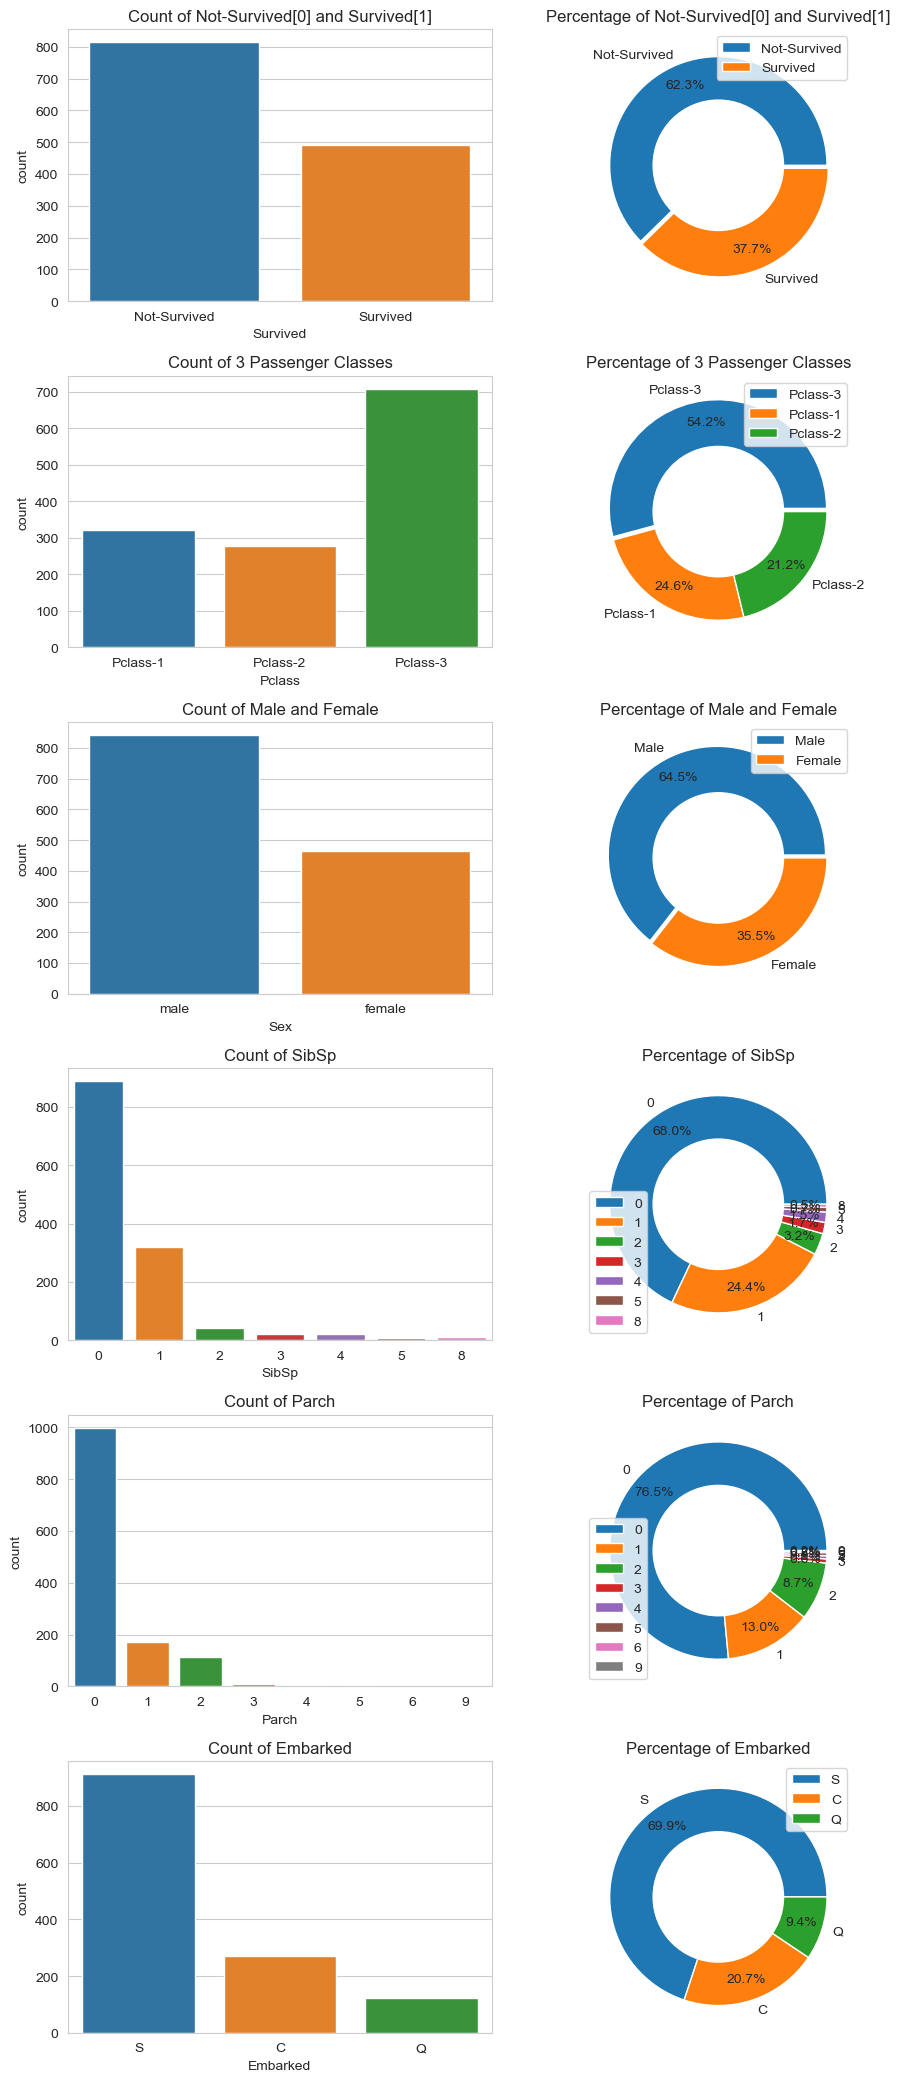

In [66]:
sns.set_style("whitegrid")
plt.figure(figsize=(9.5, 24))

plt.subplot(7,2,1)
sns.countplot(data=df, x='Survived')
plt.xticks([0, 1], ['Not-Survived', 'Survived'])
plt.title('Count of Not-Survived[0] and Survived[1]')

plt.subplot(7,2,2)
plt.pie(df['Survived'].value_counts(), labels=['Not-Survived', 'Survived'], explode=[0,0.03], autopct='%1.1f%%', pctdistance=0.80)
# draw circle
centre_circle = plt.Circle((0, 0), 0.60, fc='white')
fig = plt.gcf()
# Adding Circle in Pie chart
fig.gca().add_artist(centre_circle)
plt.title('Percentage of Not-Survived[0] and Survived[1]')
plt.legend(loc="upper right")

plt.subplot(7,2,3)
sns.countplot(data=df, x='Pclass')
plt.xticks([0,1,2], ['Pclass-1', 'Pclass-2', 'Pclass-3'])
plt.title('Count of 3 Passenger Classes')

plt.subplot(7,2,4)
plt.pie(df['Pclass'].value_counts(), labels=['Pclass-3', 'Pclass-1', 'Pclass-2'], explode=[0.03, 0, 0], autopct='%1.1f%%', pctdistance=0.80)
# draw circle
centre_circle = plt.Circle((0, 0), 0.60, fc='white')
fig = plt.gcf()
# Adding Circle in Pie chart
fig.gca().add_artist(centre_circle)
plt.title('Percentage of 3 Passenger Classes')
plt.legend(loc="upper right")

plt.subplot(7,2,5)
sns.countplot(data=df, x='Sex')
plt.title('Count of Male and Female')

plt.subplot(7,2,6)
plt.pie(df['Sex'].value_counts(), labels=['Male', 'Female'], explode=[0.03, 0], autopct='%1.1f%%', pctdistance=0.80)
# draw circle
centre_circle = plt.Circle((0, 0), 0.60, fc='white')
fig = plt.gcf()
# Adding Circle in Pie chart
fig.gca().add_artist(centre_circle)
plt.title('Percentage of Male and Female')
plt.legend(loc="upper right")

plt.subplot(7,2,7)
sns.countplot(data=df, x='SibSp')
plt.title('Count of SibSp')

plt.subplot(7,2,8)
plt.pie(df['SibSp'].value_counts(), labels=[0, 1, 2, 3, 4, 5, 8], autopct='%1.1f%%', pctdistance=0.80)
# draw circle
centre_circle = plt.Circle((0, 0), 0.60, fc='white')
fig = plt.gcf()
# Adding Circle in Pie chart
fig.gca().add_artist(centre_circle)
plt.title('Percentage of SibSp')
plt.legend(loc="lower left")

plt.subplot(7,2,9)
sns.countplot(data=df, x='Parch')
plt.title('Count of Parch')

plt.subplot(7,2,10)
plt.pie(df['Parch'].value_counts(), labels=[0, 1, 2, 3, 4, 5, 6, 9], autopct='%1.1f%%', pctdistance=0.80)
# draw circle
centre_circle = plt.Circle((0, 0), 0.60, fc='white')
fig = plt.gcf()
# Adding Circle in Pie chart
fig.gca().add_artist(centre_circle)
plt.title('Percentage of Parch')
plt.legend(loc="lower left")

plt.subplot(7,2,11)
sns.countplot(data=df, x='Embarked')
plt.title('Count of Embarked')

plt.subplot(7,2,12)
plt.pie(df['Embarked'].value_counts(), labels=['S','C','Q'], autopct='%1.1f%%', pctdistance=0.80)
# draw circle
centre_circle = plt.Circle((0, 0), 0.60, fc='white')
fig = plt.gcf()
# Adding Circle in Pie chart
fig.gca().add_artist(centre_circle)
plt.title('Percentage of Embarked')
plt.legend(loc="upper right")

plt.tight_layout()
plt.show()

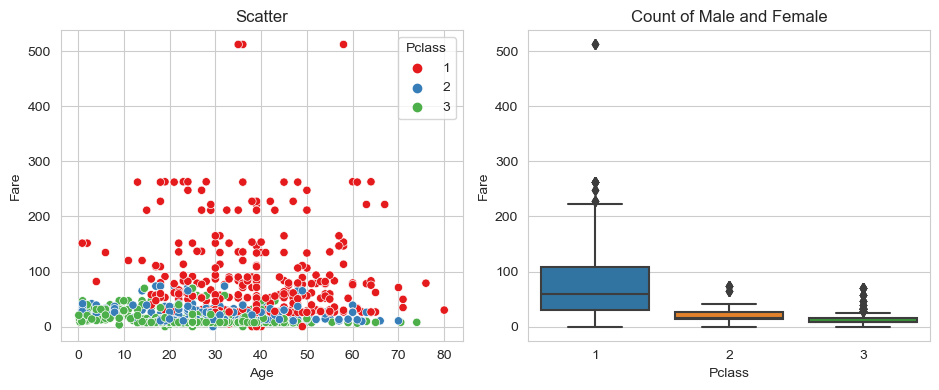

In [67]:
plt.figure(figsize=(9.5, 4))

plt.subplot(1,2,1)
sns.scatterplot(data=df, x='Age', y='Fare', hue='Pclass', palette='Set1')
plt.title('Scatter')

plt.subplot(1,2,2)
sns.boxplot(data=df, x='Pclass', y='Fare')
plt.title('Count of Male and Female')


plt.tight_layout()
plt.show()

C:\Users\DELL\AppData\Local\Temp\ipykernel_3056\2746029184.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Age'])
C:\Users\DELL\AppData\Local\Temp\ipykernel_3056\2746029184.py:8: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Fare'])


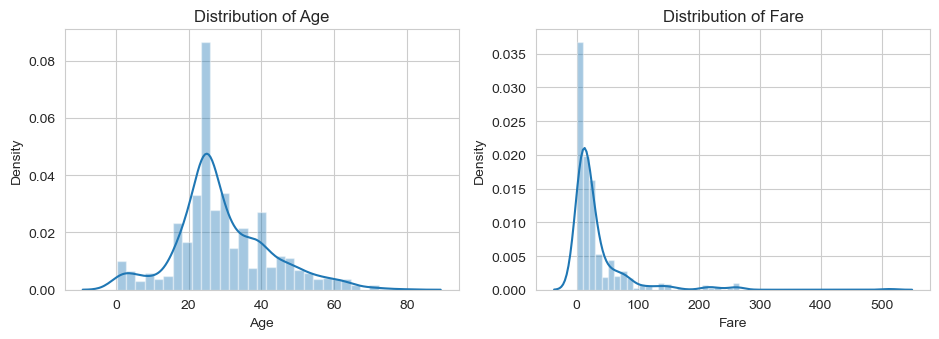

In [68]:
plt.figure(figsize=(9.5, 3.5))

plt.subplot(1,2,1)
sns.distplot(df['Age'])
plt.title('Distribution of Age')

plt.subplot(1,2,2)
sns.distplot(df['Fare'])
plt.title('Distribution of Fare')

plt.tight_layout()
plt.show()

Dealing with the Outliers//influencer

In [69]:
# Filter the highest fare, which we consider as a outlier
df[df['Fare'] > 500]

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
258,1,1,female,35.0,0,0,512.3292,C
679,1,1,male,36.0,0,1,512.3292,C
737,1,1,male,35.0,0,0,512.3292,C
1234,1,1,female,58.0,0,1,512.3292,C


In [70]:
# Creating the new data, neglecting the Outlier Fare
df = df[df['Fare'] < 500]

df.reset_index(drop=True, inplace=True)
df.shape

(1302, 8)

Visualizing the scatter and Box plot after removing the outliers

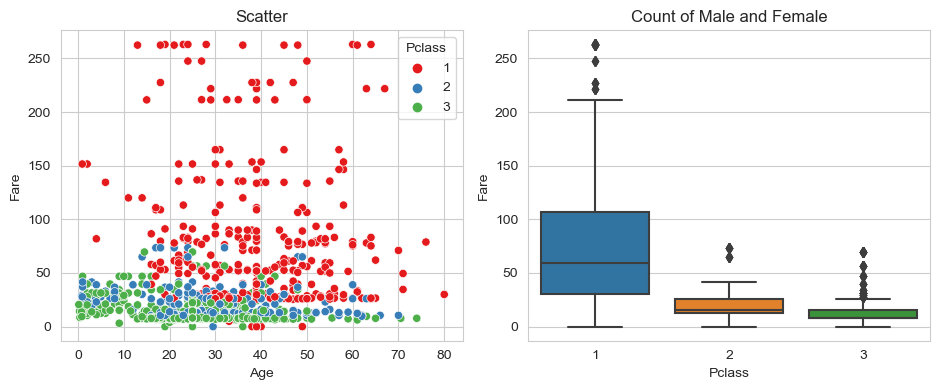

In [71]:
plt.figure(figsize=(9.5, 4))

plt.subplot(1,2,1)
sns.scatterplot(data=df, x='Age', y='Fare', hue='Pclass', palette='Set1')
plt.title('Scatter')

plt.subplot(1,2,2)
sns.boxplot(data=df, x='Pclass', y='Fare')
plt.title('Count of Male and Female')

plt.tight_layout()
plt.show()

<Figure size 950x400 with 0 Axes>

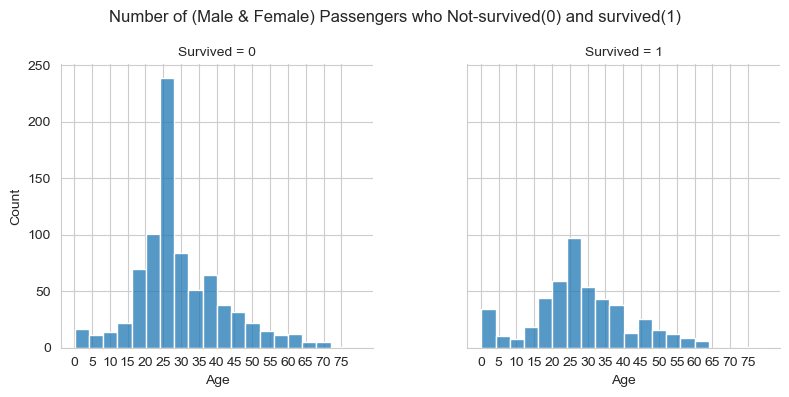

In [72]:
plt.figure(figsize=(9.5,4))

sns.displot(data=df, x="Age", col="Survived", bins=20, multiple="dodge", height=4)
plt.suptitle("Number of (Male & Female) Passengers who Not-survived(0) and survived(1)") 
plt.xticks([0,5,10,15,20,25,30,35,40,45,50,55,60,65,70,75])

plt.tight_layout()
plt.subplots_adjust(wspace=0.3)

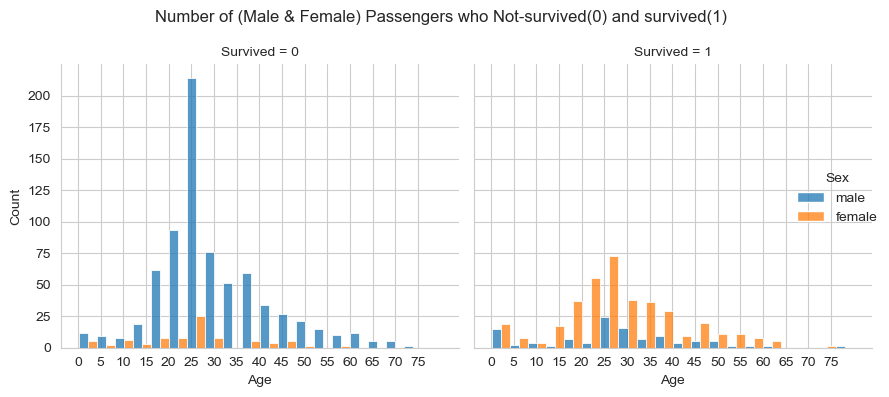

In [73]:
sns.displot(data=df, x="Age", col="Survived", bins=20, hue="Sex", multiple="dodge", height=4)
plt.suptitle("Number of (Male & Female) Passengers who Not-survived(0) and survived(1)") 
plt.xticks([0,5,10,15,20,25,30,35,40,45,50,55,60,65,70,75])

plt.tight_layout()

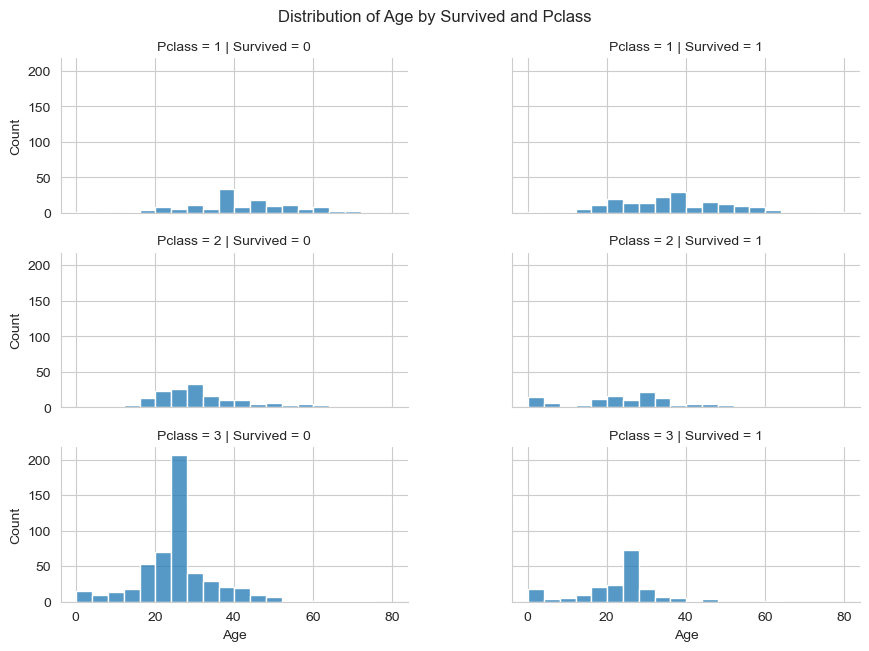

In [74]:
sns.displot(data=df, x="Age", col="Survived", row="Pclass", aspect=2, height=2.2, bins=20)

plt.suptitle("Distribution of Age by Survived and Pclass")
plt.tight_layout()
plt.subplots_adjust(wspace=0.3)
plt.show()

In [75]:
df.groupby(["Survived","Sex"])["Sex"].count()

Survived  Sex   
0         female     81
          male      733
1         female    381
          male      107
Name: Sex, dtype: int64

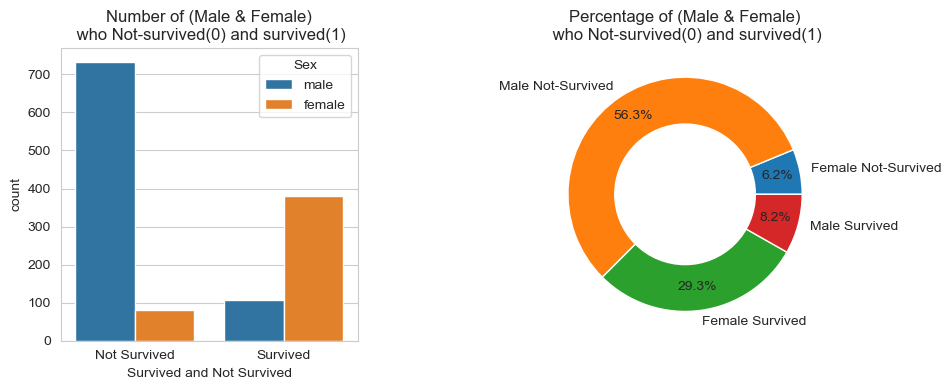

In [76]:
plt.figure(figsize=(9.5, 4))

plt.subplot(1,2,1)
sns.countplot(data=df, x="Survived", hue="Sex")
plt.xlabel("Survived and Not Survived")
plt.title("Number of (Male & Female)\n who Not-survived(0) and survived(1)")
plt.xticks([0,1], ["Not Survived", "Survived"])

plt.subplot(1,2,2)
plt.pie(df.groupby(["Survived","Sex"])["Sex"].count(), labels=["Female Not-Survived","Male Not-Survived","Female Survived","Male Survived"], autopct='%1.1f%%', pctdistance=0.8)
plt.title("Percentage of (Male & Female)\n who Not-survived(0) and survived(1)")
#plt.legend(loc="lower left")
# draw circle
centre_circle = plt.Circle((0, 0), 0.60, fc='white')
fig = plt.gcf()
# Adding Circle in Pie chart
fig.gca().add_artist(centre_circle)

plt.tight_layout()
plt.subplots_adjust(wspace=0.6)

In [77]:
df.groupby(["Pclass", "Survived"])["Survived"].count()

Pclass  Survived
1       0           137
        1           180
2       0           160
        1           117
3       0           517
        1           191
Name: Survived, dtype: int64

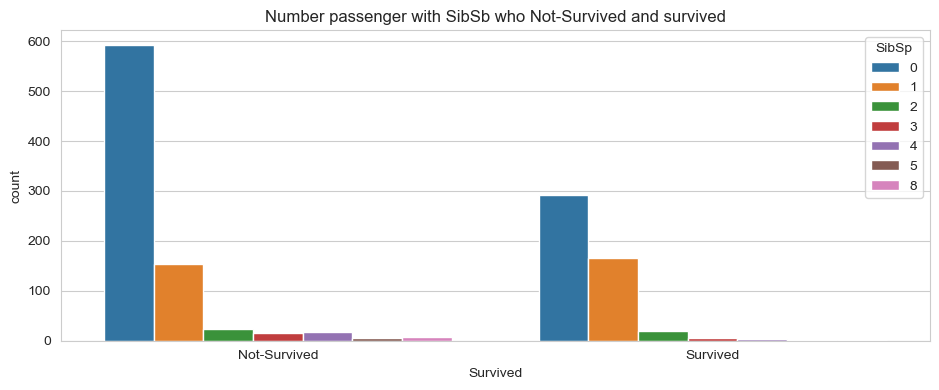

In [79]:
plt.figure(figsize=(9.5, 4))

sns.countplot(data=df, x="Survived", hue="SibSp")
plt.title("Number passenger with SibSb who Not-Survived and survived")
plt.xticks([0,1], ['Not-Survived', 'Survived'])

plt.tight_layout()

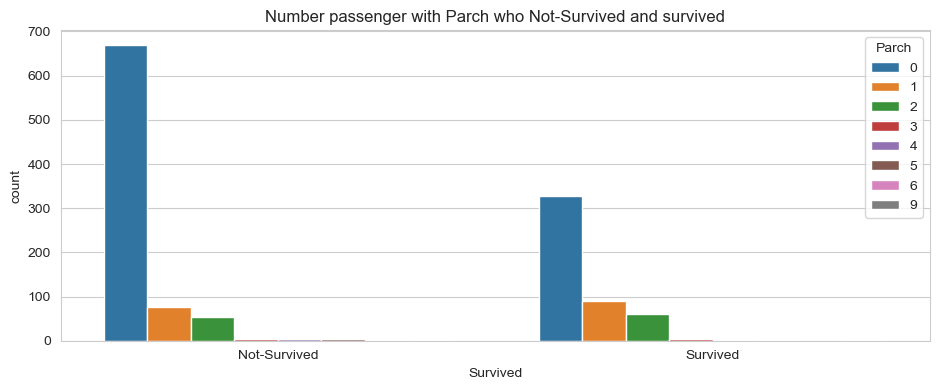

In [80]:
plt.figure(figsize=(9.5, 4))

sns.countplot(data=df, x="Survived", hue="Parch")
plt.title("Number passenger with Parch who Not-Survived and survived")
plt.xticks([0,1], ['Not-Survived', 'Survived'])

plt.tight_layout()
plt.show()

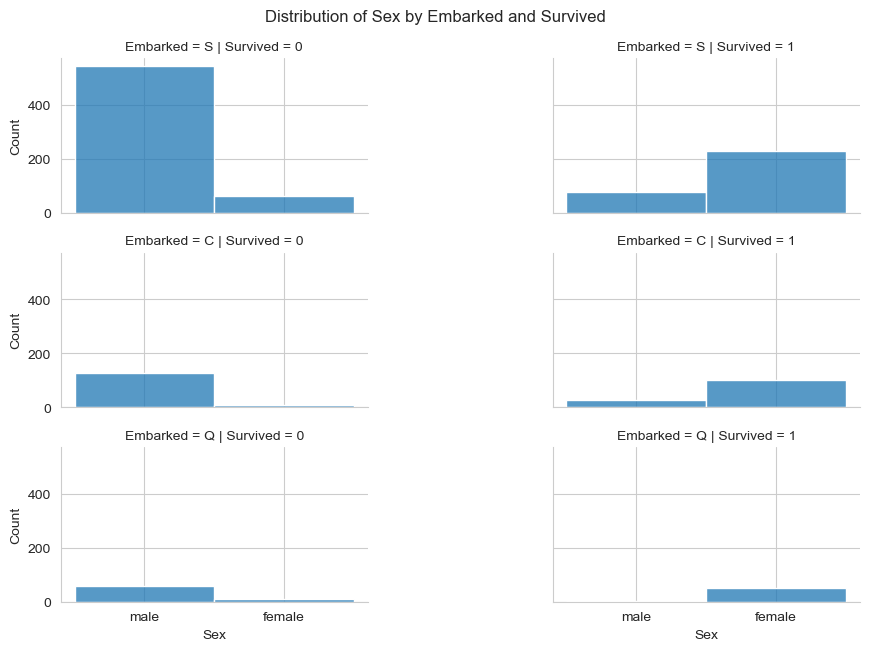

In [81]:
sns.displot(data=df, x="Sex", row="Embarked", col="Survived", aspect=2, height=2.2)

plt.suptitle("Distribution of Sex by Embarked and Survived")
plt.tight_layout()
plt.subplots_adjust(wspace=0.6)
plt.show()

C:\Users\DELL\AppData\Local\Temp\ipykernel_3056\382684015.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  g = sns.heatmap(data = df.corr(), annot=True, linewidth=0.5)


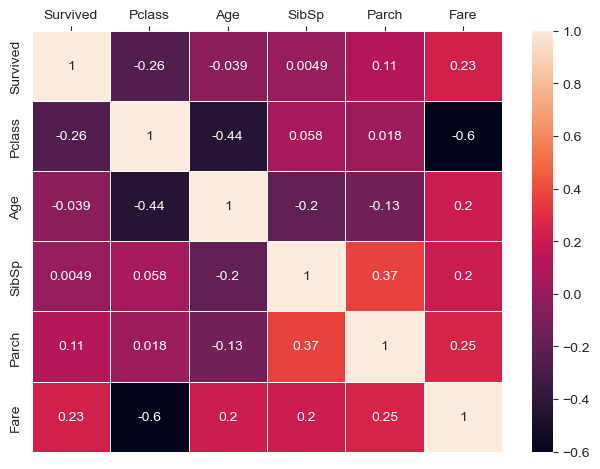

In [82]:
g = sns.heatmap(data = df.corr(), annot=True, linewidth=0.5)
g.xaxis.tick_top()
plt.tight_layout()
plt.show()

Splitting the data as Dependent and Independent variable

In [83]:
df.shape

(1302, 8)

In [84]:
x = df.iloc[:, 1:]
y = df.iloc[:, 0]

print("Shape of Independent Variable: ", x.shape)
print("Shape of Dependent Variable  : ", y.shape)

Shape of Independent Variable:  (1302, 7)
Shape of Dependent Variable  :  (1302,)


# Label Encoding

Label encoding is a technique used to convert categorical variables into numerical format. Many machine learning algorithms work with numerical inputs. By encoding categorical variables into numerical labels, we enable the algorithms to process and understand the data.

In [85]:
# Encoding the categorical variable Sex with labels 
x['Sex'] = x['Sex'].replace({'male': 0, 'female': 1})
# Encoding the categorical variable Embarked with labels 
x['Embarked'] = x['Embarked'].replace({'S': 0, 'C': 1, 'Q': 2})

In [87]:
x.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,0,22.0,1,0,7.2500,0
1,1,1,38.0,1,0,71.2833,1
2,3,1,26.0,0,0,7.9250,0
3,1,1,35.0,1,0,53.1000,0
4,3,0,35.0,0,0,8.0500,0


# Feature Scaling

Feature scaling is required in many machine learning algorithms to ensure that all features contribute equally to the model's learning process. When features have different scales or units, they can dominate the learning process and influence the model more significantly than others.

In [88]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
x_scaled = scaler.fit_transform(x)

In [89]:
x_scaled

array([[ 0.83805101, -0.74161985, -0.55772219, ..., -0.44476359,
        -0.55084749, -0.60140808],
       [-1.5574318 ,  1.34839972,  0.66783269, ..., -0.44476359,
         0.88872927,  0.92795387],
       [ 0.83805101,  1.34839972, -0.25133347, ..., -0.44476359,
        -0.53567235, -0.60140808],
       ...,
       [ 0.83805101, -0.74161985,  0.70613128, ..., -0.44476359,
        -0.55084749, -0.60140808],
       [ 0.83805101, -0.74161985, -0.32793065, ..., -0.44476359,
        -0.53286214, -0.60140808],
       [ 0.83805101, -0.74161985, -0.32793065, ...,  0.7087866 ,
        -0.21118739,  0.92795387]])

# Splitting the data as training and testing set

In [90]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x_scaled, y, test_size=0.2, random_state=22)

print('Shape of training Data  : ', x_train.shape)
print('Shape of Training Target: ', y_train.shape)
print('Shape of Testing Data   : ', x_test.shape)
print('Shape of Testing target : ', y_test.shape)

Shape of training Data  :  (1041, 7)
Shape of Training Target:  (1041,)
Shape of Testing Data   :  (261, 7)
Shape of Testing target :  (261,)


# Building the Artificial Neural Network

In [91]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Input
from tensorflow.keras.callbacks import EarlyStopping

ann_model = Sequential()
ann_model.add(Dense(64, input_shape=(7,), activation='relu'))
ann_model.add(Dense(32, activation='relu'))
ann_model.add(Dense(1, activation='sigmoid'))

In [92]:
ann_model.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_18 (Dense)            (None, 64)                512       
                                                                 
 dense_19 (Dense)            (None, 32)                2080      
                                                                 
 dense_20 (Dense)            (None, 1)                 33        
                                                                 
Total params: 2,625
Trainable params: 2,625
Non-trainable params: 0
_________________________________________________________________


In [93]:
# Define the EarlyStopping callback
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

ann_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
H = ann_model.fit(x_train, y_train, batch_size=32, epochs=100, validation_data=(x_test, y_test), callbacks=early_stopping)

Epoch 1/100
33/33 [==============================] - 3s 19ms/step - loss: 0.6246 - accuracy: 0.7147 - val_loss: 0.5229 - val_accuracy: 0.8544
Epoch 2/100
33/33 [==============================] - 0s 5ms/step - loss: 0.4638 - accuracy: 0.8578 - val_loss: 0.3915 - val_accuracy: 0.8659
Epoch 3/100
33/33 [==============================] - 0s 5ms/step - loss: 0.3896 - accuracy: 0.8540 - val_loss: 0.3542 - val_accuracy: 0.8697
Epoch 4/100
33/33 [==============================] - 0s 5ms/step - loss: 0.3680 - accuracy: 0.8578 - val_loss: 0.3439 - val_accuracy: 0.8736
Epoch 5/100
33/33 [==============================] - 0s 5ms/step - loss: 0.3615 - accuracy: 0.8588 - val_loss: 0.3395 - val_accuracy: 0.8659
Epoch 6/100
33/33 [==============================] - 0s 5ms/step - loss: 0.3576 - accuracy: 0.8588 - val_loss: 0.3393 - val_accuracy: 0.8697
Epoch 7/100
33/33 [==============================] - 0s 6ms/step - loss: 0.3530 - accuracy: 0.8598 - val_loss: 0.3316 - val_accuracy: 0.8736
Epoch 8/100


In [94]:
loss, accuracy = ann_model.evaluate(x_test, y_test)

print('Test Loss    : ', loss)
print('Test Accuracy: ', accuracy)

9/9 [==============================] - 0s 4ms/step - loss: 0.3157 - accuracy: 0.8889
Test Loss    :  0.3156548738479614
Test Accuracy:  0.8888888955116272


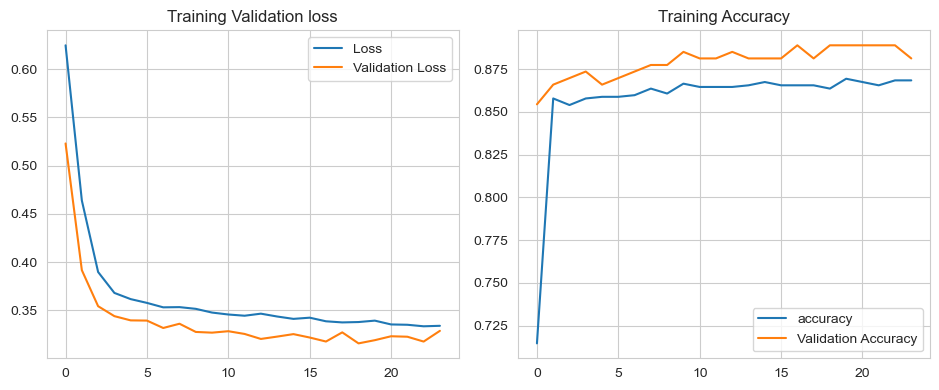

In [96]:
plt.figure(figsize=(9.5, 4))

plt.subplot(1,2,1)
plt.plot(H.history['loss'], label='Loss')
plt.plot(H.history['val_loss'], label='Validation Loss')
plt.legend()
plt.title('Training Validation loss')

plt.subplot(1,2,2)
plt.plot(H.history['accuracy'], label='accuracy')
plt.plot(H.history['val_accuracy'], label='Validation Accuracy')
plt.legend()
plt.title('Training Accuracy')

plt.tight_layout()
plt.show()

# Predicting the Test set

In [97]:
predictions = ann_model.predict(x_test)
predicted = pd.DataFrame(data=predictions, columns=['Predicted'])

# Convert probabilities to predicted classes
predicted['Predicted_Class'] = predicted['Predicted'].apply(lambda x: 1 if x >= 0.5 else 0)

predicted.head()

9/9 [==============================] - 0s 5ms/step


,Predicted,Predicted_Class
0,0.632232,1
1,0.043204,0
2,0.978958,1
3,0.984234,1
4,0.984251,1


In [101]:
y_test.reset_index(drop=True, inplace=True)

# Compare actual and predicted classifications
result = pd.DataFrame({'Actual': y_test, 'Predicted': predicted['Predicted_Class']})

result.head()

,Actual,Predicted
0,1,1
1,1,0
2,1,1
3,1,1
4,1,1


In [102]:
result['correct'] = result['Actual'] == result['Predicted']
result.head(10)

,Actual,Predicted,correct
0,1,1,True
1,1,0,False
2,1,1,True
3,1,1,True
4,1,1,True
5,0,0,True
6,1,1,True
7,1,1,True
8,0,1,False
9,0,0,True


In [103]:
result['correct'].value_counts()

True     232
False     29
Name: correct, dtype: int64

In [104]:
correct_predictions = result['correct'].value_counts()[0]
total_instances = result.shape[0]

percentage = (correct_predictions / total_instances) * 100

print("Percentage of correct predictions: ", percentage)

Percentage of correct predictions:  88.88888888888889


The model has correctly predicted 89% percent of classes, as the evaluated score also 89% percent. Hence the model is proved and performed good.